# Bank Marketing Campaign

## Pemahaman Masalah Bisnis (Understanding of Business Problems)

**Konteks**  

Bank XYZ merupakan salah satu bank swasta terbesar di Indonesia yang memiliki berbagai macam produk keuangan. Salah satu produk keuangan yang ditawarkan oleh Bank XYZ adalah deposito berjangka. Ketika seorang nasabah mendepositokan sejumlah uang kepada Bank XYZ, maka uang tersebut baru bisa diambil setelah jangka waktu tertentu. Nasabah akan mendapatkan kompensasi berupa bunga dengan besaran persentase yang disesuaikan dengan nominal uang yang didepositokan.

Sebagai sebuah badan usaha, Bank XYZ tentunya berusaha agar tidak kalah saing dengan bank lainnya sehingga Bank XYZ perlu melakukan *marketing campaing* supaya nasabah mau mendepositokan uangnya di Bank XYZ. Bank XYZ ingin *marketing campaign* yang akan dilakukan mampu menggaet sebanyak mungkin nasabah untuk mendepositokan uangnya. Oleh sebab itu, Tim Marketing di Bank XYZ meminta Tim Data Analisis untuk mencoba mengolah data nasabah dan mempresentasikan hasil pengolahan data tersebut untuk membantu tim marketing dalam menyusun marketing campaign.

**Target**

0: Nasabah yang tidak akan mengambil deposito berjangka<br>
1: Nasabah yang akan mengambil deposito berjangka

**Pernyataan Masalah (Problem Statement)**

Jika Tim Marketing Bank XYZ langsung menargetkan semua nasabah yang dimiliki tanpa adanya *selection* atau penyaringan, maka *marketing campaign* akan menghabiskan waktu dan sumber daya yang tidak sedikit. Efisiensi marketing dapat dilakukan dengan mengetahui tipe nasabah mana yang memiliki kencenderungan untuk mau membuka deposito berjangka.

**Goal**

Berdasarkan pernyataan masalah yang telah dijabarkan, Tim Marketing Bank XYZ ingin memprediksi kemungkinan seorang nasabah akan/mau membuka deposito berjangka atau tidak, sehingga *marketing campaign* dapat difokuskan kepada nasabah yang tertarik untuk membuka deposito berjangka di Bank XYZ.

Selain itu, Tim Marketing ingin mengetahui faktor/variabel apa yang membuat seorang nasabah tertarik untuk mengambil deposito berjangka atau tidak, sehingga mereka dapat membuat rencana yang lebih baik dalam mendekati nasabah potensial (nasabah yang ingin membuka deposito berjangka di bank mereka).

**Pendekatan Analitik (Analytic Approach)**

Tim Data Analysis akan mengolah dana menganalisis data nasabah Bank XYZ untuk menemukan pola yang membedakan antara nasabah yang mau mengambil deposito berjangka dan yang tidak mau. Setelah itu, Tim Data Analysis akan membangun model klasifikasi yang akan membantu Tim Marketing untuk dapat memprediksi probabilitas seorang nasabah akan/mau mengambil deposito berjangka atau tidak.

**Metric Evaluation**

Type I error: False Positive (FP)  
Konsekuensi: sia-sianya biaya, waktu dan sumber daya untuk melakukan *marketing campaign*

Type II error: False Negative (FN)  
Konsekuensi: kehilangan calon nasabah deposito berjangka

Dengan adanya konsekuensi yang dinyatakan di kedua tipe error di atas, model yang dibuat sebisa mungkin mengurangi biaya *marketing campaign* Bank XYZ tanpa membuat jumlah nasabah deposito berjangka yang didapatkan kurang atau terlalu sedikit. Hasil prediksi yang diinginkan adalah sebanyak mungkin prediksi *true positive* dan sekecil mungkin prediksi *false positive* dan metric evaluasi utama yang digunakan adalah roc_auc.

## Pemahaman Data (Data Understanding)

Sumber dataset: https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW

Catatan (notes):
- Dataset tidak seimbang (imbalance)
- Sebagian besar fitur bersifat kategori (nominal, ordinal, dan binary), beberapa dengan kardinalitas tinggi
- Setiap baris data merepresentasikan informasi seorang nasabah yang ditawarkan deposito berjangka di masa lalu

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| age | Int | Usia Nasabah |
| job | Text | Pekerjaan Nasabah |
| balance | Int | Saldo Nasabah |
| housing | Text | Status Kepemilikan Rumah |
| loan | Text | Memiliki Pinjaman atau Tidak |
| contact | Text | Sarana Komunikasi/Kontak |
| month | Text | Bulan Terkahir Kali Nasabah Dikontak |
| campaign | Int | Jumlah Kontak yang Dilakukan untuk Marketing Sebelumnya |
| pdays | Int | Jumlah Hari Nasabah Dikontak pada Marketing Sebelumnya |
| poutcome | Text | Hasil Marketing Sebelumnya |
| deposit | Text | Nasabah Membuka Deposito atau Tidak |

In [49]:
# Library
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [50]:
# Mengakses dataset
df = pd.read_csv("data_bank_marketing_campaign.csv")
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [51]:
# Melihat jumlah kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


## Pembersihan Data (Data Cleaning)

Dataset yang tersedia harus sudah siap pakai dan bebas dari *missing data* sebelum dianalisa dan digunakan untuk pembuatan *machine learning*.

In [52]:
ListItem = []
for col in df.columns:
    ListItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data = ListItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[27, 43]"
1,job,object,0,0.0,12,"[blue-collar, management]"
2,balance,int64,0,0.0,3153,"[1160, 1495]"
3,housing,object,0,0.0,2,"[yes, no]"
4,loan,object,0,0.0,2,"[yes, no]"
5,contact,object,0,0.0,3,"[telephone, unknown]"
6,month,object,0,0.0,12,"[feb, aug]"
7,campaign,int64,0,0.0,32,"[8, 30]"
8,pdays,int64,0,0.0,422,"[143, 28]"
9,poutcome,object,0,0.0,4,"[unknown, other]"


In [53]:
# Jumlah missing value di setiap kolom
(df.isna().sum()/df.shape[0])*100

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
deposit     0.0
dtype: float64

Dari hasil pengecekan *missing value* di atas, dapat dilihat bahwa data yang tersedia tidak memiliki data kosong atau data hilang.

Kolom balance, pdays, dan poutcome dihapus karena data pada kedua kolom ini tidak akan digunakan untuk analisa yang akan dilakukan dan juga tidak memiliki manfaat dalam pembuatan model machine learning.

In [54]:
df.drop(['balance', 'pdays', 'poutcome'],axis=1, inplace=True)

Di bawah ini adalah pengecekan ulang dataframe di mana kolom balance, pdays, dan poutcome telah dihapus.

In [55]:
ListItem = []
for col in df.columns:
    ListItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data = ListItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[85, 50]"
1,job,object,0,0.0,12,"[self-employed, student]"
2,housing,object,0,0.0,2,"[no, yes]"
3,loan,object,0,0.0,2,"[yes, no]"
4,contact,object,0,0.0,3,"[cellular, telephone]"
5,month,object,0,0.0,12,"[mar, may]"
6,campaign,int64,0,0.0,32,"[21, 43]"
7,deposit,object,0,0.0,2,"[yes, no]"


Terlihat dari tabel dataframe di atas, dataset sudah bersih dan siap untuk digunakan ke tahapan analisis.

## Analisis Data (Data Analysis)

Text(0.5, 1.0, 'Housing Histogram')

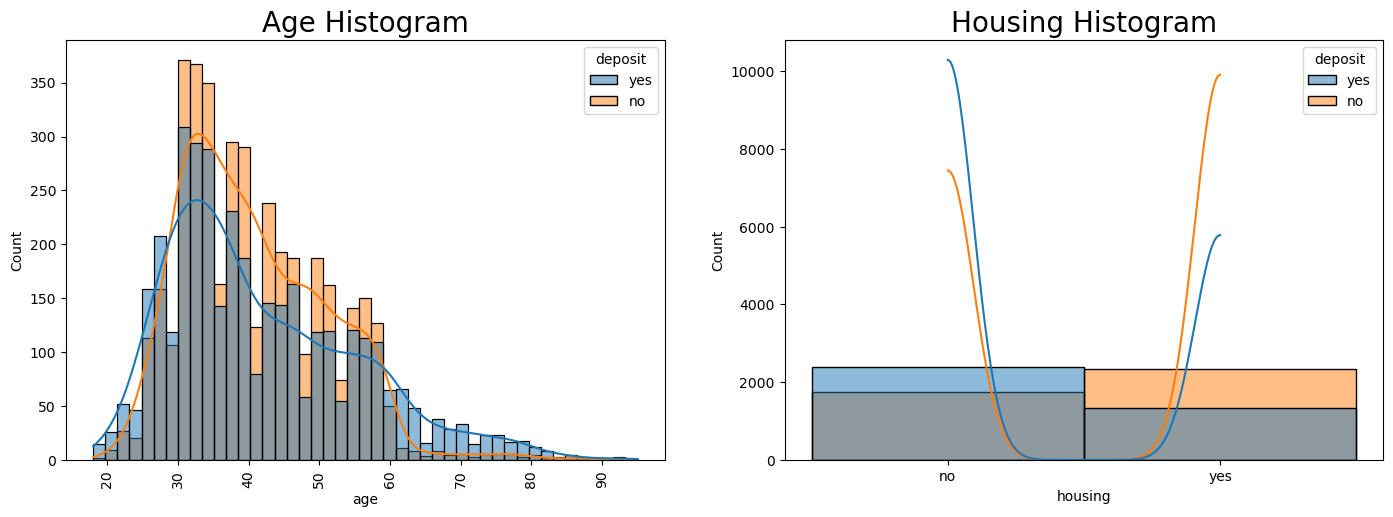

In [56]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df, x='age', hue='deposit', kde=True)
plt.xticks(rotation=90)
plt.title('Age Histogram', fontsize=20)

plt.subplot(222)
sns.histplot(data=df, x='housing', hue='deposit', kde=True)
plt.title('Housing Histogram', fontsize=20)

Berdasarkan histogram diatas, dapat disimpulkan bahwa terlihat perbedaan distribusi usia (`age`) dari nasabah yang tidak tertarik dengan deposito berjangka (`no`) dan nasabah yang tertarik dengan deposito berjangka (`yes`), di mana nasabah yang tidak tertarik dengan deposit berjangka kebanyakan berada pada usia 30-60 tahun.

Visualisasi distribusi `housing` memperlihatkan adanya sedikit perbedaan antara yang tidak tertarik dengan deposito berjangka dan yang tertarik dengan deposito berjangka, di mana nasabah dengan kepemilikan `housing` = no atau tidak memiliki rumah cenderung tertarik dengan deposit berjangka.

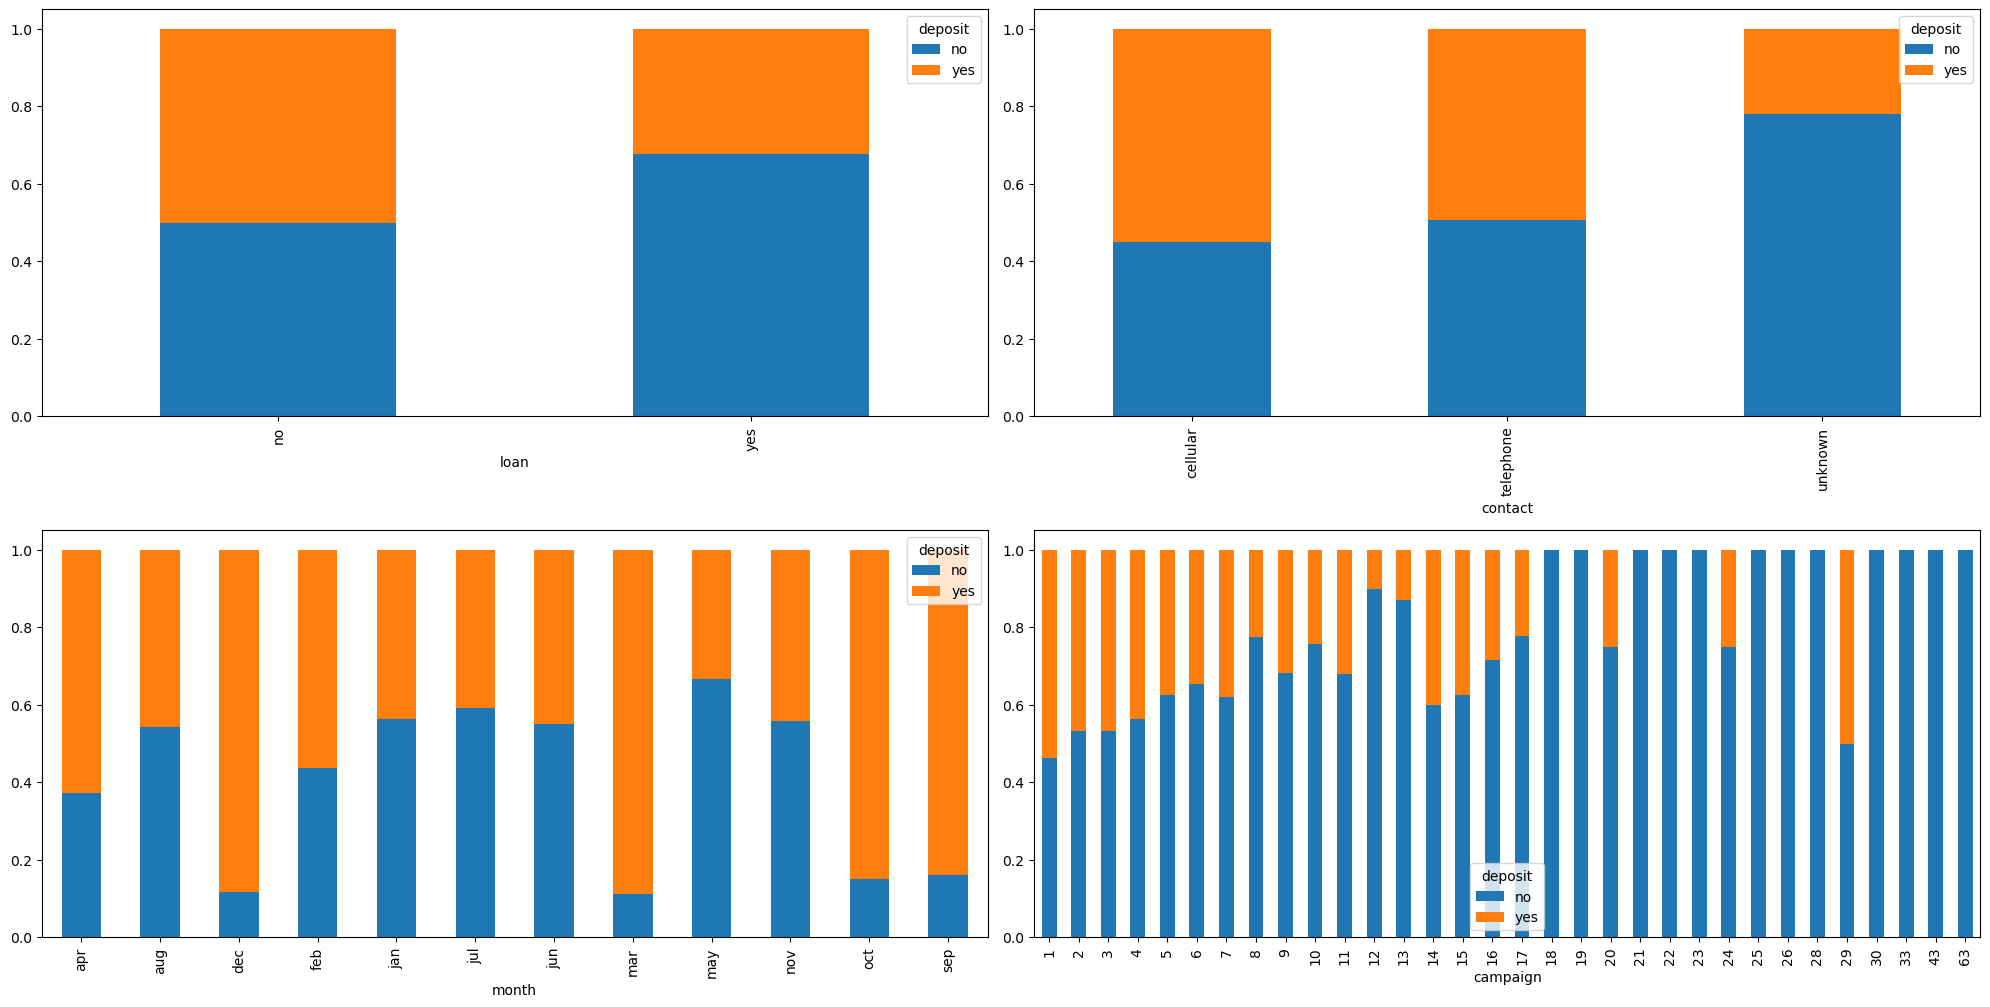

In [57]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['deposit', 'age', 'housing', 'job']).columns:
    count += 1
    ax = plt.subplot(4,2,count)
    pd.crosstab(df[i], df['deposit'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    fig.tight_layout()

plt.show()

Berdasarkan barplot diatas, ada beberapa hal yang dapat disimpulkan:
1. Nasabah yang tidak sedang memiliki pinjaman di bank (`loan` = `no`) cenderung tertarik dengan deposito berjangka dibandingkan dengan nasabah yang memilki pinjaman di bank (`loan` = `yes`).
2. Tidak ada perbedaan jauh antara nasabah yang dikontak melalui handphone (`cellular`) dengan nasabah yang dikontak melalui telepon rumah (`telephone`) perihal ketertarikan mereka dengan deposito berjangka, sedangkan nasabah yang dikontak dengan cara lain (`unknown`) cenderung tidak tertarik dengan deposito berjangka.
3. Nasabah yang dikontak pada bulan Maret (`mar`), September (`sep`), Oktober(`oct`), dan Desember (`dec`) memiliki ketertarikan yang lebih tinggi untuk membuka deposito berjangka daripada kandidat yang dikontak pada bulan lainnya.
4. Nasabah yang dikontak sebanyak 1 kali (jumlah `campaign` = 1) selama masa *marketing campaign* sebelumnya cenderung tertarik dengan deposito berjangka dan ketertarikan ini cenderung menurun seiring dengan semakin seringnya seorang nasabah dikontak selama masa *marketing campaign* berlangsung.

In [58]:
job_df = df.groupby('job')['deposit'].value_counts(normalize=True).unstack()
job_df

deposit,no,yes
job,,
admin.,0.525641,0.474359
blue-collar,0.625557,0.374443
entrepreneur,0.601695,0.398305
housemaid,0.608696,0.391304
management,0.489955,0.510045
retired,0.324074,0.675926
self-employed,0.546429,0.453571
services,0.604863,0.395137
student,0.255061,0.744939


Dari tabel di atas, terlihat bahwa ada perbedaan kecenderungan minat nasabah berdasarkan jenis pekerjaan yang mereka miliki.

Di bawah ini, kita coba melihat 4 jenis pekerjaan dengan jumlah nasabah terbanyak dan bagaimana kecenderungannya terhadap produk deposito berjangka.

In [59]:
df['job'].value_counts()

job
management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

In [60]:
job_df.sort_values(by='yes', ascending=False).loc['management']

deposit
no     0.489955
yes    0.510045
Name: management, dtype: float64

In [61]:
job_df.sort_values(by='yes', ascending=False).loc['blue-collar']

deposit
no     0.625557
yes    0.374443
Name: blue-collar, dtype: float64

In [62]:
job_df.sort_values(by='yes', ascending=False).loc['technician']

deposit
no     0.539117
yes    0.460883
Name: technician, dtype: float64

In [63]:
job_df.sort_values(by='yes', ascending=False).loc['admin.']

deposit
no     0.525641
yes    0.474359
Name: admin., dtype: float64

Nasabah dengan jenis pekerjaan `blue-collar`,`technician`, dan `admin` memiliki kecenderungan lebih banyak yang tidak tertarik dengan deposito berjangka dibandingkan dengan yang tertarik, sedangkan untuk nasabah dengan jenis pekerjaan `management` lebih banyak yang tertarik dengan deposito berjangka dibandingkan dengan yang tidak tertarik.

Setelah melakukan visualisasi dan analisis, dataset dipersiakan untuk pembuatan model machine learning. 

## Data Preparation

In [64]:
df.head()

,age,job,housing,loan,contact,month,campaign,deposit
0,55,admin.,no,no,cellular,jun,2,yes
1,39,self-employed,yes,yes,cellular,apr,3,yes
2,51,admin.,no,no,cellular,may,1,yes
3,38,services,yes,no,cellular,may,1,no
4,36,housemaid,yes,no,telephone,nov,4,no


Tahapan awal dalam *data preparation* adalah dengan melakukan encoding terhadap fitur-fitur *categorical* dan *numerical* yang dimiliki oleh dataset agar bisa dibaca dan dimengerti oleh model machine learning.
Berikut ini adalah jenis-jenis encoding yang akan dilakukan terhadap masing-masing fitur:

1. Mengubah fitur/kolom `age` dan `month` menggunakan Binary Encoding karena kedua fitur ini memiliki *unique data* yang cukup banyak sehingga bila One Hot Encoding digunakan akan terlalu banyak fitur baru yg terbuat. Selain itu, fitur `age` memiliki lompatan jarak antar *value* yang besarnya tidak sama.
2. Mengubah fitur/kolom `job` menggunakan Binary Encoding karena fitur ini memiliki *unique data* yang banyak dan tidak memiliki urutan atau tidak ordinal. Bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yang dibuat dan kalau kita menggunakan Ordinal/Label Encoding, hasilnya akan kurang sesuai atau kurang baik.
3. Mengubah fitur/kolom `housing`, `loan`, dan `contact` menggunakan One Hot Encoding karena fitur ini tidak memiliki urutan atau tidak ordinal dan juga jumlah data uniknya hanya sedikit.
4. Mengubah fitur/kolom `campaign` menggunakan Ordinal Encoding karena fitur ini memiliki urutan atau ordinal dengan lompatan *value* antar `campaign` yang hampir semuanya sama dan juga memiliki jumlah unique data yang tidak terlalu banyak.
5. Mengubah fitur/kolom `deposit` menjadi Integer agar dapat dipakai dalam permodelan machine learning.

In [65]:
df['deposit'] = df['deposit'].replace({'no': 0, 'yes': 1}).astype(int)
df['deposit']

0       1
1       1
2       1
3       0
4       0
       ..
7808    1
7809    1
7810    0
7811    0
7812    1
Name: deposit, Length: 7813, dtype: int32

In [66]:
ordinal_mapping = [
    {'col':'campaign',
    'mapping':{
        '1'      :    0,
        '2'       :    1,
        '3'       :    2,
        '4'       :    3,
        '5'       :    4,
        '6'       :    5,
        '7'       :    6,
        '8'       :    7,
        '9'       :    8,
        '10'      :    9,
        '11'      :    10,
        '12'      :    11,
        '13'      :    12,
        '14'      :    13,
        '15'      :    14,
        '16'      :    15,
        '17'      :    16,
        '18'      :    17,
        '19'      :    18,
        '20'      :    19,
        '21'      :    20,
        '22'      :    21,
        '23'      :    22,
        '24'      :    23,
        '25'      :    24,
        '26'      :    25,
        '28'      :    26,
        '29'      :    27,
        '30'      :    28,
        '33'      :    29,
        '43'      :    30,
        '63'      :    31
    }}
    ]

In [67]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop = 'first'), ['housing', 'loan', 'contact']),
    ('ordinal', ce.OrdinalEncoder(mapping = ordinal_mapping), ['campaign']),
     ('binary', ce.BinaryEncoder(), ['age', 'job', 'month'])
    ], remainder = 'passthrough')

In [68]:
x = df.drop(columns = ['deposit'])
y = df['deposit']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(
                                x, 
                                y, 
                                stratify = y, 
                                test_size = 0.2,
                                random_state = 2021)

In [70]:
testing = pd.DataFrame(transformer.fit_transform(x_train), columns = transformer.get_feature_names_out())
testing.head()

,onehot__housing_yes,onehot__loan_yes,onehot__contact_telephone,onehot__contact_unknown,ordinal__campaign,binary__age,binary__job_0,binary__job_1,binary__job_2,binary__job_3,binary__month_0,binary__month_1,binary__month_2,binary__month_3
0,1.0,0.0,0.0,1.0,5.0,41.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,5.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,3.0,38.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,3.0,32.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,4.0,25.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## Modeling and Evaluation

Karena modeling yang akan dibuat adalah modeling classification, maka kita panggil 6 jenis function classitication modeling dan disimpan ke dalam variabel untuk mempermudah pembuatan syntax machine learning. 

In [71]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Model Benchmarking: K-Fold (Data Train)

Di sini kita aplikasikan *cross validation* K-Fold pada data train untuk mencari classification method dengan nilai skor ROC AUC yang paling mendekati 1. Model dengan skor ROC AUC mendekati 1 artinya model tersebut paling cocok digunakan.

In [72]:
models = [logreg, knn, dt, rf, xgb, lgbm]
score = []
rata = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    model_cv = cross_val_score(estimator, x_train, y_train, cv = skfold, scoring = 'roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'], 
              'mean roc_auc':rata, 'sdev':std}).set_index('model').sort_values(by = 'mean roc_auc', ascending = False)

,mean roc_auc,sdev
model,,
LightGBM,0.744920,0.010967
XGBoost,0.728288,0.011851
Logistic Regression,0.726390,0.019710
Random Forest,0.698117,0.013974
KNN,0.665099,0.019382
Decision Tree,0.613868,0.013662


Dari dataframe di atas, terlihat bahwa model LightGBM memiliki score ROC AUC yang paling mendekati 1 (menggunakan default hyperparameter) dibandingkan kelima model lainnya.

### Model Benchmarking: Data Test

Model benchmarking juga dilakukan terhadap data test untuk memastikan performa dari model benchmarking train data bisa diperaya dan bukan disebabkan oleh data train yang overfitting terhadap model LightGBM. 

In [73]:
models = [logreg, knn, dt, rf, xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    x_train, x_test
    estimator.fit(x_train, y_train)
    return(estimator,estimator.predict(x_test), x_test)

for i, j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator, y_pred, x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(j,'\n', classification_report(y_test, y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by = 'roc_auc score', ascending = False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       816
           1       0.65      0.60      0.63       747

    accuracy                           0.66      1563
   macro avg       0.66      0.65      0.65      1563
weighted avg       0.66      0.66      0.66      1563

KNN 
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       816
           1       0.63      0.60      0.61       747

    accuracy                           0.64      1563
   macro avg       0.64      0.64      0.64      1563
weighted avg       0.64      0.64      0.64      1563

Decision Tree 
               precision    recall  f1-score   support

           0       0.62      0.66      0.64       816
           1       0.60      0.56      0.58       747

    accuracy                           0.61      1563
   macro avg       0.61      0.61      0.61      1563
weighted avg       0.61      0

,roc_auc score
model,
LightGBM,0.746990
XGBoost,0.738578
Logistic Regression,0.721991
Random Forest,0.703017
KNN,0.658812
Decision Tree,0.617577


Dapat dilihat kembali bahwa model LightGBM adalah yang terbaik performanya pada data test karena memiliki nilai ROC AUC yang paling mendekati 1.

### Test Oversampling with K-Fold Cross Validation

Oversampling dilakukan terhadap data yang imbalance untuk melihat apakah setelah oversampling dilakukan, model lightGBM dapat memberikan hasil prediksi yang lebih akurat.

In [79]:
def calc_train_error(x_train, y_train, model):
#   '''returns in-sample error for already fit model.'''
    predictions = model.predict(x_train)
    predictProba = model.predict_proba(x_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(x_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(x_test)
    predictProba = model.predict_proba(x_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(x_train, y_train, x_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(x_train, y_train)
    train_error = calc_train_error(x_train, y_train, model)
    validation_error = calc_validation_error(x_test, y_test, model)
    return train_error, validation_error

In [80]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [81]:
data = x_train
target = y_train

In [82]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):

    # membagi data (split) antara data train dan data validasi untuk masing-masing variabel dan target
    x_train, x_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    # print(len(X_val), (len(X_train) + len(X_val))) untuk menjalankan fungsi oversampling
    ros = RandomOverSampler()

    x_ros, y_ros = ros.fit_resample(x_train, y_train)

    # untuk memasukkan model yang akan diuji dengan data oversampling (instantiate model) 
    lgbm = lgb.LGBMClassifier()
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', lgbm)
    ])

    # menghitung error dari masing-masing data train dan data validation (dengan dan tanpa oversampling)
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(x_train, y_train, x_val, y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(x_ros, y_ros, x_val, y_val, estimator)

    # masukkan nilai error ke dalam list yang sesuai 
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics without Oversampling

In [83]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.770644,0.682060,0.862296,0.744089,0.767874,0.678157,0.692594,0.598513,0.800191,0.693966
1,0.772027,0.673179,0.859029,0.730679,0.769202,0.667275,0.692594,0.565056,0.802878,0.694064
2,0.771434,0.653641,0.857491,0.724085,0.768446,0.650180,0.688871,0.579926,0.804348,0.655462
3,0.770051,0.715808,0.861717,0.793851,0.766708,0.708856,0.681010,0.587361,0.807258,0.763285
4,0.775188,0.674956,0.860669,0.746883,0.773316,0.672958,0.716591,0.624535,0.792677,0.672000
5,0.776812,0.622776,0.864815,0.694381,0.773855,0.618715,0.693835,0.542751,0.811321,0.621277
6,0.771479,0.713523,0.859892,0.778004,0.769407,0.710546,0.708437,0.641791,0.791224,0.725738
7,0.765357,0.693950,0.859119,0.755946,0.762312,0.686258,0.682796,0.563433,0.796815,0.733010
8,0.769307,0.699288,0.861285,0.757532,0.767258,0.696163,0.707196,0.626866,0.788018,0.708861
9,0.776615,0.661922,0.863047,0.736579,0.773967,0.657480,0.699752,0.574627,0.806867,0.669565


#### Evaluation Metrics with Oversampling

In [84]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                     tr['recall'], val['recall'], tr['precision'], val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.774858,0.680284,0.866566,0.747376,0.774479,0.677844,0.733837,0.620818,0.799423,0.681633
1,0.771645,0.676732,0.859824,0.734283,0.771234,0.673142,0.729301,0.598513,0.796778,0.685106
2,0.779773,0.642984,0.858523,0.723997,0.779650,0.642438,0.756144,0.631970,0.793651,0.625000
3,0.774858,0.717584,0.864930,0.796216,0.774184,0.713887,0.720227,0.631970,0.808574,0.739130
4,0.778450,0.669627,0.863466,0.750291,0.778383,0.669501,0.761059,0.680297,0.788484,0.646643
5,0.786092,0.637011,0.870876,0.696626,0.785735,0.635515,0.745276,0.598513,0.811523,0.626459
6,0.779395,0.709964,0.863601,0.771995,0.778905,0.708561,0.732325,0.671642,0.808431,0.705882
7,0.773724,0.686833,0.862377,0.753998,0.773514,0.683222,0.743289,0.608209,0.791465,0.696581
8,0.778639,0.697509,0.864735,0.747138,0.778511,0.695469,0.754631,0.645522,0.792693,0.697581
9,0.777505,0.663701,0.863247,0.741357,0.777164,0.662074,0.738374,0.623134,0.801066,0.654902


Hasil evaluation metrics untuk recall dari kelas positive (`deposit` = yes) lebih baik atau lebih tinggi setelah dilakukan oversampling tetapi skor evaluation metrics untuk precision dalam menebak kelas positif menjadi sedikit lebih buruk. Hal ini memang bisa terjadi karena jumlah data kelas positif diperbanyak agar sama dengan jumlah data kelas negatif sehingga recall dari kelas yang minoritas naik yang berdampak pada precision menjadi turun. Namun, bila diamati, kenaikan recall lebih besar dibandingkan dengan penurunan precision. 

Dapat dikatakan bahwa setelah kita melakukan oversampling, model bisa menghasilkan prediksi jumlah nasabah yang lebih banyak daripada sebelumnya tetapi ketepatan/precision dalam menebak nasabah potensial berkurang yang menyebabkan *cost* marketing yang terbuang menjadi lebih tinggi bila dibandingkan dengan model yang tidak dilakukan oversampling.

Apa jenis model yang sebaiknya digunakan? Dalam penentuan model, kita harus melihat situasi permasalahan yang sedang dihadapi. 
1. Sudah cukup banyak nasabah yang mengambil deposito berjangka dan kita tidak membutuhkan semua nasabah untuk disertakan dalam *marketing campaign*
2. Nasabah yang mengambil deposito berjangka masih sedikit jumlahnya atau pas-pasan.

Apabila kasus 1 yang terjadi, maka kita dapat menggunakan model tanpa oversampling (precision lebih penting dibandingkan recall). Namun, bila kasus 2 yang dihadapi, maka kita dapat menggunakan model dengan oversampling (recall lebih penting dari precision). 

Pemilihan model yang akan digunakan harus didasarkan pada situasi permasalahan yang dihadapi maupun yang dapat menyelesaikan masalah dengan lebih baik, dalam hal ini memberikan hasil yang optimal untuk *marketing campaign* yang akan diadakan Bank XYZ.  
Berikutnya, kita akan coba melihat classification report.

#### Classification Reports without Oversampling

Berikut ini adalah classification report dari performa model machine learning LightGBM yang dijalankan sebanyak 10 kali percobaan tanpa oversampling (K = 10).

In [96]:
for rep in validation_errors_without_oversampling:
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       294
           1       0.69      0.60      0.64       269

    accuracy                           0.68       563
   macro avg       0.68      0.68      0.68       563
weighted avg       0.68      0.68      0.68       563

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       294
           1       0.69      0.57      0.62       269

    accuracy                           0.67       563
   macro avg       0.68      0.67      0.67       563
weighted avg       0.68      0.67      0.67       563

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       294
           1       0.66      0.58      0.62       269

    accuracy                           0.65       563
   macro avg       0.65      0.65      0.65       563
weighted avg       0.65      0.65      0.65       563

              preci

#### Classification Reports with Oversampling

Berikut ini adalah classification report dari performa model machine learning LightGBM yang dijalankan sebanyak 10 kali percobaan dengan oversampling (K = 10).

In [97]:
for rep in validation_errors_with_oversampling:
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.68      0.73      0.71       294
           1       0.68      0.62      0.65       269

    accuracy                           0.68       563
   macro avg       0.68      0.68      0.68       563
weighted avg       0.68      0.68      0.68       563

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       294
           1       0.69      0.60      0.64       269

    accuracy                           0.68       563
   macro avg       0.68      0.67      0.67       563
weighted avg       0.68      0.68      0.67       563

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       294
           1       0.62      0.63      0.63       269

    accuracy                           0.64       563
   macro avg       0.64      0.64      0.64       563
weighted avg       0.64      0.64      0.64       563

              preci

Berdasarkan perbandingan classification reports di atas, model yang telah dilakukan oversampling memiliki recall dari kedua kelas (0 dan 1) yang lebih seimbang. Oleh karena itu, untuk kasus kali ini, kita akan menggunakan model with oversampling di mana kasus 2 menjadi situasi permasalahan yang akan diselesaikan (membutuhkan nasabah deposito berjangka yang lebih banyak).

### Hyperparameter Tuning

Kita juga akan mencoba untuk melakukan hyperparameter tuning pada model LightGBM untuk mendapatkan parameter yang paling baik agar model LightGBM dapat memproses data dengan lebih efisien.

Refrensi parameter tuning untuk model LightGBM: https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [98]:
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [99]:
# hyperparam_space=[{
#     'model__max_bin': [255, 275, 300, 230], # semakin tinggi max_bin semakin tinggi accuracy tetapi semakin lambat data training
#     'model__num_leaves':[31, 21, 41, 51], # paramameter utama untuk mengatur kompleksitas model tree, di mana semakin tinggi num_leaves, semakin tinggi accuracy
#     'model__min_data_in_leaf': [20, 15, 30, 40], # digunakan untuk mencegah overfitting dengan menaikkan angkanya
#     'model__num_iterations':[100,75, 125, 150], # semakin kecil nilainya, training time akan berkurang, namun accuracy juga berkurang
#     'model__learning_rate': [0.1, 0.075, 0.125, 0.05], # bila dinaikkan, accuracy akan semakin naik
#     'model__random_state': [42]
# }]

In [107]:
hyperparam_space=[{
    'model__max_bin': [255, 260, 265, 270], # semakin tinggi max_bin semakin tinggi accuracy tetapi semakin lambat data training
    'model__num_leaves':[31, 32, 33, 34], # mengatur kompleksitas model tree, semakin tinggi num_leaves, semakin tinggi accuracy
    'model__min_data_in_leaf': [20, 22, 24, 26], # digunakan untuk mencegah overfitting dengan menaikkan angkanya
    'model__num_iterations':[100, 75, 70, 65], # semakin kecil nilainya, training time akan berkurang, namun accuracy juga berkurang
    'model__learning_rate': [0.1, 0.11, 0.113, 0.115], # bila dinaikkan, accuracy akan semakin naik
    'model__random_state': [42]
}]

Nilai default hyperparameter LightGBM: `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

In [108]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

Function GridSearchCV digunakan untuk mencari kombinasi value dari setiap parameter yang paling optimal.

In [109]:
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
0.7486203660906312
{'model__learning_rate': 0.1, 'model__max_bin': 255, 'model__min_data_in_leaf': 26, 'model__num_iterations': 65, 'model__num_leaves': 33, 'model__random_state': 42}


Hyperparameter terbaik untuk LightGBM dari hasil Gridsearch => `max_bin` = 255, `num_leaves` = 33, `min_data_in_leaf` = 26, `num_iterations` = 65, `learning_rate` = 0.1

Parameter yang dimasukkan berdasarkan trial dan error dengan menaikkan atau menurunkan nilai default parameter.

In [110]:
best_model = grid.best_estimator_ # memasukkan hasil hyperparameter terbaik yang telah ditentukan oleh GridSearchCV
best_model.fit(x_train, y_train) # menggunakan training data ke model yang sudah diberikan hyperparameter

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'campaign',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 1      0
2      1
3      2
4      3
5      4
6      5
7      6
8      7
9      8
10     9
11    10
12    11
13    12
14    13
15    14
16    15
17    16
18    17
19    18
20    19
21    20
22    21
23    22
24    23
25    24
26    25
28    26
29    27
30    28
33    29
43    30
63    31
dtype: int64}]),
                                                  ['campaign']),
                                                 ('binary', BinaryEncoder(),
                                                  ['age', 'job', 'month'])])),
                ('model',
                 LGBMClassifier(max_bin=255, min_data_in_leaf=26,
                                num_iterations=65, num_leaves=33,
                                random_state=42))])

In [111]:
estimator = Pipeline([
    ('oversampling', ros),
    ('preprocess', transformer),
    ('model', lgbm)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'campaign',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 1      0
2      1
3      2
4      3
5      4
6      5
7      6
8      7
9      8
10     9
11    10
12    11
13    12
14    13
15    14
16    15
17    16
18    17
19    18
20    19
21    20
22    21
23    22
24    23
25    24
26    25
28    26
29    27
30    28
33    29
43    30
63    31
dtype: int64}]),
                                                  ['campaign']),
                                                 ('binary', BinaryEncoder(),
                                                  ['age', 'job', 'month'])])),
                ('model', LGBMClassifier())])

In [112]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC score default LGBM : ', roc_auc_default)
print('ROC AUC score tuned LGBM : ', roc_auc_tuned)

ROC AUC score default LGBM :  0.7358478029766122
ROC AUC score tuned LGBM :  0.7434287804814028


Setelah dilakukan hyperparameter tuning, model LightGBM memiliki nilai ROC AUC yang lebih baik walaupun hanya naik sedikit saja.

Kita coba untuk melihat perbandingan classification report-nya.

In [113]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       816
           1       0.67      0.62      0.65       747

    accuracy                           0.67      1563
   macro avg       0.67      0.67      0.67      1563
weighted avg       0.67      0.67      0.67      1563

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       816
           1       0.69      0.62      0.65       747

    accuracy                           0.69      1563
   macro avg       0.69      0.68      0.68      1563
weighted avg       0.69      0.69      0.68      1563



Berdasarkan hasil classification report, model LightGBM yang telah dilakukan hyperparameter tuning lebih baik dibandingkan model LightGBM yang menggunakan hyperparameter default, walaupun hanya sedikit lebih baik saja. Oleh karena itu kita akan menggunakan model LightGBM yang sudah dilakukan hyperparameter tuning sebagai model akhir.

### Feature Importances

Kita harus melihat fitur/kolom apa saja yang paling penting untuk model LightGBM yang akan kita gunakan.

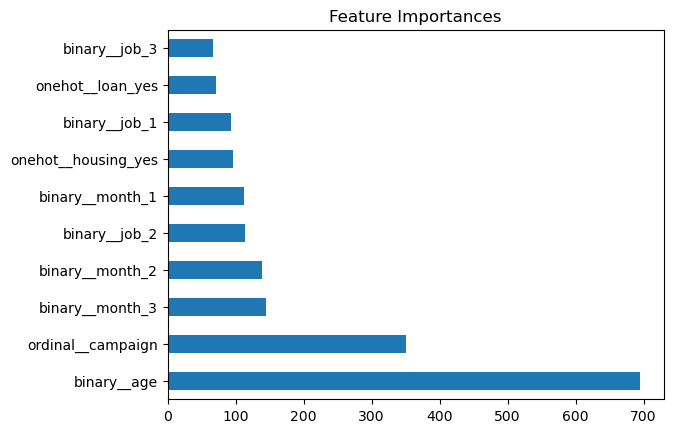

In [118]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dari barplot di atas, fitur/kolom yang paling penting untuk model LightGBM kita adalah binary_age, kemudian diikuti dengan ordinal_campaign, binary_month_3, dan seterusnya.

## Kesimpulan dan Rekomendasi

### Kesimpulan

In [119]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       816
           1       0.69      0.62      0.65       747

    accuracy                           0.69      1563
   macro avg       0.69      0.68      0.68      1563
weighted avg       0.69      0.69      0.68      1563



Berdasarkan hasil classification report model yang telah dibuat, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model tersebut untuk memfilter/menyaring daftar nasabah yang akan kita coba kontak pada saat *marketing campaign*, maka model machine learning yang telah dibuat dapat mengurangi 75% jumlah nasabah yang tidak tertarik dengan produk deposito berjangka dan dapat meprediksi 62% dari jumlah nasabah yang tertarik dengan deposito berjangka. Persentase ini diambil dari skor recall yang ditunjukkan oleh **Classification Report Tuned LGBM**.

Terkait precision, model machine learning yang telah dibuat memiliki ketepatan prediksi nasabah yang tertarik dengan deposito berjangka sebesar 69%. Jadi, setiap kali model memprediksi bahwa seorang nasabah tertarik dengan deposito berjangka setelah diberikan *marketing campaign*, maka kurang lebih 69% prediksi terhadap nasabah tersebut adalah benar. Namun, berdasarkan hasil recall masih ada nasabah yang sebenarnya tidak tertarik dengan deposito berjangka tetapi diprediksi oleh model sebagai nasabah yang tertarik dengan deposito berjangka (False Positive) di mana angkanya berkisar 25% dari keseluruhan nasabah yang tidak tertarik dengan deposito berjangka.

Dengan menggunakan data biaya per nasabah untuk *marketing campaign* sebelumnya yang diberikan oleh Tim Marketing Bank XYZ kepada Tim *Data Analysis*, yakni sebesar 500 USD, serta dengan estimasi jumlah nasabah yang dimiliki oleh Bank XYZ sebanyak 200 orang, di mana dianggap 100 orang tertarik dengan deposito berjangka dan 100 orang lagi tidak tertarik dengan deposito berjangka, maka perhitungannya kira-kira akan seperti di bawah ini.

Tanpa model (semua nasabah ditawarkan deposito berjangka) :
- Total biaya *marketing campaign* = 200 x 500 USD = 100,000 USD
- Total nasabah yang ditawari dan tertarik untuk mengambil deposito berjangka = 100 orang (semua nasabah diberikan *marketing campaign*)
- Total nasabah yang tidak ditawari tetapi tertarik untuk mengambil deposito berjangka = 0 orang (semua nasabah diberikan *marketing campaign*)
- Biaya *marketing campaign* yang terbuang = 100 x 500 USD = 50,000 USD (100 nasabah yang ditawari deposito berjangka menolak)
- Jumlah penghematan biaya *marketing campaign* = 0 USD

Dengan model machine learning (hanya menawari deposito berjangka kepada nasabah yang diprediksi "akan tertarik" oleh model):
- Total biaya *marketing campaign* = (62 x 500 USD) + (25 x 500 USD) = 31,000 USD + 12,500 USD = 43,500 USD
- Total nasabah yang ditawari dan tertarik untuk mengambil deposito berjangka = 62 orang (berdasarkan skor recall dari model dengan hasil prediksi "akan tertarik" sebesar 62%)
- Total nasabah yang tidak ditawari tetapi tertarik untuk mengambil deposito berjangka = 38 orang (berdasarkan selisih dari skor recall dari model dengan hasil prediksi "akan tertarik" sebesar 62%)
- Biaya *marketing campaign* yang terbuang = 25 x 500 USD = 12,500 USD (berdasarkan selisih dari skor recall dari model dengan hasil prediksi "tidak tertarik" sebesar 75%)
- Jumlah penghematan biaya *marketing campaign* = 75 x 500 USD = 37,500 USD (berdasarkan skor recall dari model dengan hasil prediksi "tidak tertarik" sebesar 75%)

Berdasarkan contoh perhitungan di atas, dengan menggunakan model machine learning yang telah dibuat, maka Bank XYZ dapat menghemat biaya yang cukup signifikan dalam upaya *marketing campaign* karena menargetkan nasabah-nasabah tertentu yang cenderung akan tertarik untuk membuka deposito berjangka daripada langsung mengontak semua nasabah Bank XYZ yang ada.

### Recommendation

Berikut ini adalah beberapa rekomendasi untuk mengembangkan project dan model machine learning agar prediksi terkait perlakuan *marketing campaign* bisa lebih optimal:
- Data "unknown" pada kolom `job` dan `contact` sebisa mungkin diminimalisir atau derngan menambah kategori baru untuk kedua kolom tersebut agar bisa merepresentasikan data sebenarnya dari data "unknown" tersebut, misalkan di kolom `job` ditambahkan jenis pekerjaan sepeti 'private sector employee' dan 'civil servant' dan untuk kolom `contact` bisa ditambahkan kategori "email" dan "direct approach".
- Fitur atau kolom baru yang kemungkinan besar berhubungan dengan ketertarikan nasabah terhadap deposito berjangka bisa ditambahkan ke dalam dataset tetapi dengan jumlah data *unique* yang tidak terlewat besar seperti `balance` dan `poutcome`, contohnya "status pernikahan" dan "range gaji/penghasilan per bulan".
- Dari segi permodelan, algorithm machine learning yang lain bisa dicoba untuk mebandingkan tingkat hasil prediksi disertai dengan mencoba hyperparameter tuning kembali. Selain itu, kita bisa menggunakan teknik oversampling yang berbeda selain dari Random Over Sampling, seperti SMOTE-NC.
- Data nasabah yang akan digunakan untuk permodelan bisa ditambah agar menaikkan accuracy dari model yang dibuat dan mengurangi overfitting.
- Kita bisa menganalisa kembali data nasabah yang salah tebak, misalkan setelah dilakukan *marketing campaign*, seorang nasabah yang diprediksi model machine learning akan tertarik dengan deposito berjangka ternyata nasabah tersebut tidak tertarik. Data nasabah yang salah tebak ini bisa dicari tahu alasan mengapa nasabah tersebut menolak dan mungkin saja bisa dijadikan sebagai feature baru "alasan menolak/tidak tertarik".

### Thank You